In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sea
import pandas as pd
from spec_exam import Gen_spec
import os
from astropy.io import fits
from astropy.table import Table
import fsps
import img_scale
from glob import glob
from astropy.wcs import wcs
sea.set(style='white')
sea.set(style='ticks')
sea.set_style({'xtick.direct'
               'ion': 'in','xtick.top':True,'xtick.minor.visible': True,
               'ytick.direction': "in",'ytick.right': True,'ytick.minor.visible': True})
cmap = sea.cubehelix_palette(12, start=2, rot=.2, dark=0, light=1.0, as_cmap=True)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

### set home for files
hpath = os.environ['HOME'] + '/'

In [5]:
sp = fsps.StellarPopulation(imf_type = 2, tpagb_norm_type=0, zcontinuous = 3, sfh = 3, dust_type = 1)

Gs = Gen_spec('GND', 21156, 1.25257,
               g102_lims=[8300, 11288], g141_lims=[11288, 16500],mdl_err = False,
            phot_errterm = 0.0, decontam = True) 

cleaned


/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:548: RuntimeWarning: invalid value encountered in true_divide
  self.optimal_profile = m/m.sum(axis=0)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3423: RuntimeWarning: divide by zero encountered in true_divide
  self.ivar = 1/self.grism.data['ERR']**2


In [49]:
def Covariance(wave, flux, error, a, b, l):
    A =  a**2*np.diag(error**2)
    
    lam1 =np.array([wave]).T * np.ones([len(wave),len(wave)])
    lam2 =np.array([wave]) * np.ones([len(wave),len(wave)])
    
    fmax = flux.max()
    dlam = wave[ -1] - wave[0]
    
    DLAM = lam1 - lam2

    B = (b * fmax)**2 * np.exp(-DLAM**2 / (2 * (l * dlam)**2))
    
    return A + B

In [116]:
C = Covariance(Gs.Bwv,Gs.Bfl,Gs.Ber, 0.1, .1,1)

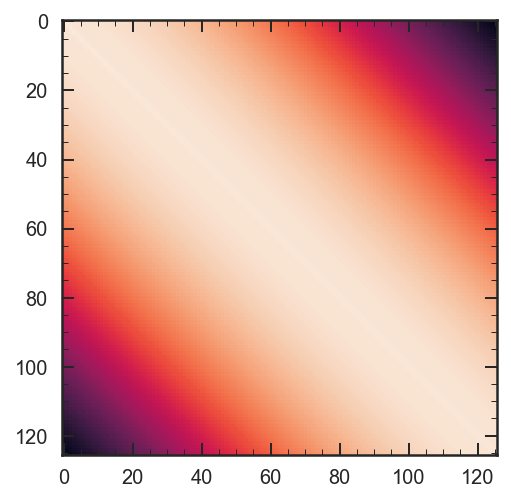

In [117]:
plt.imshow(C)

In [109]:
np.log(np.clip([np.linalg.det(C)],1E-100,np.inf))


array([-230.2585093])

In [98]:
np.log(np.linalg.det(C).astype(np.float128))

/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


-inf

In [111]:
sign, logdet = np.linalg.slogdet(C)
logdet

-10997.442653416138

In [103]:
np.linalg.inv(C)

array([[ 1.48367486e+37, -2.39385482e+33, -2.80478246e+33, ...,
         2.10726613e+23,  2.58831339e+23,  2.53707954e+23],
       [-2.39385482e+33,  1.41368064e+37, -2.69784472e+33, ...,
         1.57757825e+23,  2.35203650e+23,  2.51372289e+23],
       [-2.80478246e+33, -2.69784472e+33,  1.67256051e+37, ...,
         8.62737646e+22,  2.31409780e+23,  2.89876410e+23],
       ...,
       [ 2.10726613e+23,  1.57757825e+23,  8.62737646e+22, ...,
         1.66357011e+38, -3.18417714e+35, -2.90762776e+35],
       [ 2.58831339e+23,  2.35203650e+23,  2.31409780e+23, ...,
        -3.18417714e+35,  1.70634405e+38, -3.01433617e+35],
       [ 2.53707954e+23,  2.51372289e+23,  2.89876410e+23, ...,
        -2.90762776e+35, -3.01433617e+35,  1.57219595e+38]])